In [2]:
pip install tqdm

     |████████████████████████████████| 76 kB 3.1 MB/s eta 0:00:011
Note: you may need to restart the kernel to use updated packages.


In [3]:
# All the necessary libraries are imported 
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from tqdm import tqdm
import seaborn as sns 
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
%matplotlib inline
import matplotlib.patches as mpatches

In [4]:
# The dataset which is in csv format is read here
data = pd.read_csv('adult.csv')
# The column names from the dataset are added to the dataframe
data.columns = ['age', 'workclass', 'fnlwgt', 'education',
                     'education_num', 'marital_status', 'occupation', 'relationship', 'race', 'sex',
                     'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']

In [5]:
# The data preprocessing begins from here where all the missing values (?) are located and replaced by a nan value

df = data.replace(' ?', np.nan)
df.shape
# Rows which consist of a nan value are fully eliminated
df = df.dropna(axis = 0, how='any')

In [6]:
df.shape

(30161, 15)

<function matplotlib.pyplot.show(*args, **kw)>

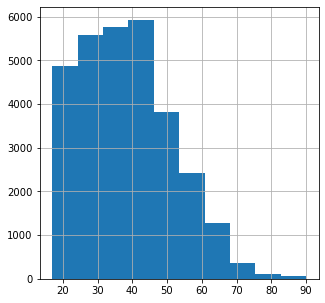

In [7]:
df['age'].hist(figsize = (5,5))
plt.show

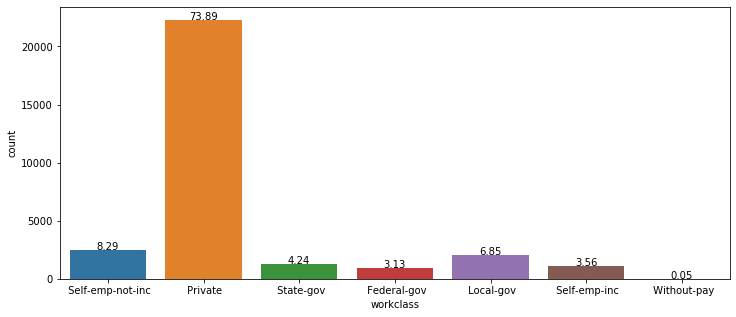

In [8]:
plt.figure(figsize=(12,5))

total = float(len(df['income']))

a = sns.countplot(x='workclass',data=df)

for f in a.patches:
    height = f.get_height()
    a.text(f.get_x() + f.get_width()/2., height+3, '{:1.2f}'.format((height/total)*100),ha="center")
plt.show()

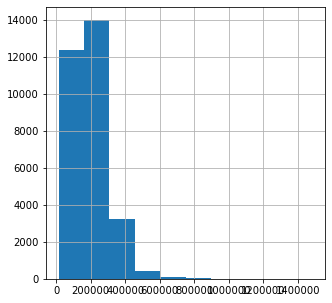

In [9]:
df['fnlwgt'].hist(figsize = (5,5))
plt.show()

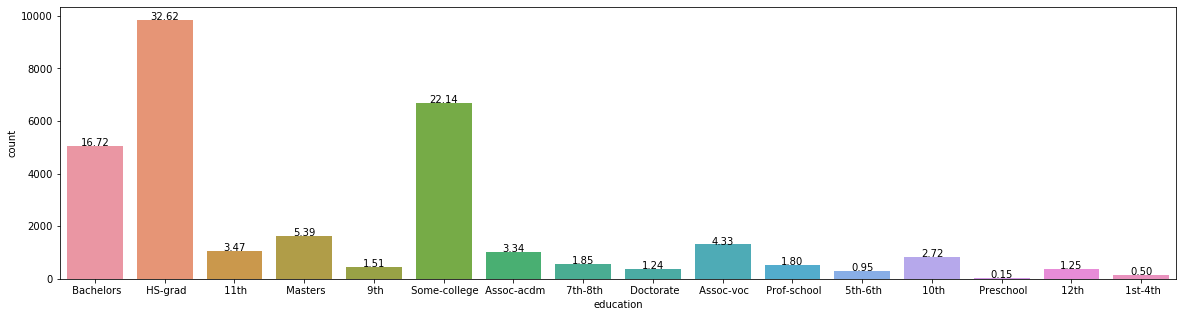

In [10]:
plt.figure(figsize=(20,5)) # we can group these into 4 types 

a= float(len(['income']))

a= sns.countplot(x='education',data=df)
for s in a.patches:
    height = s.get_height()
    a.text(s.get_x()+s.get_width()/2.,height+3,'{:1.2f}'.format((height/total)*100),ha='center')
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

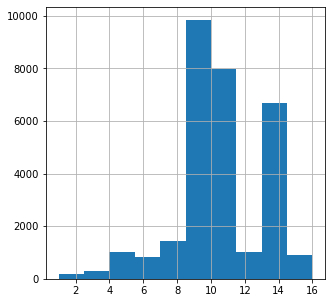

In [11]:
df['education_num'].hist(figsize = (5,5))
plt.show

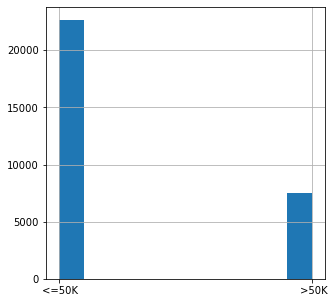

In [12]:
df['income'].hist(figsize = (5,5))
plt.show()

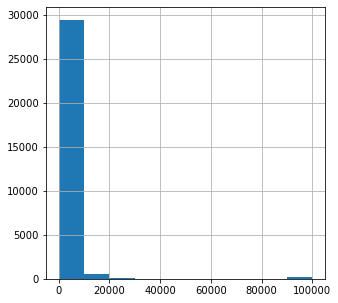

In [13]:
df['capital_gain'].hist(figsize=(5,5))
plt.show()

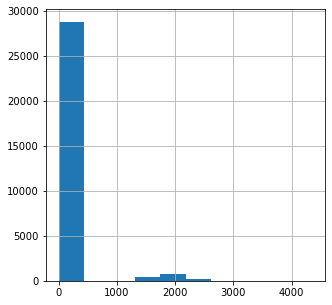

In [14]:
df['capital_loss'].hist(figsize=(5,5))
plt.show()

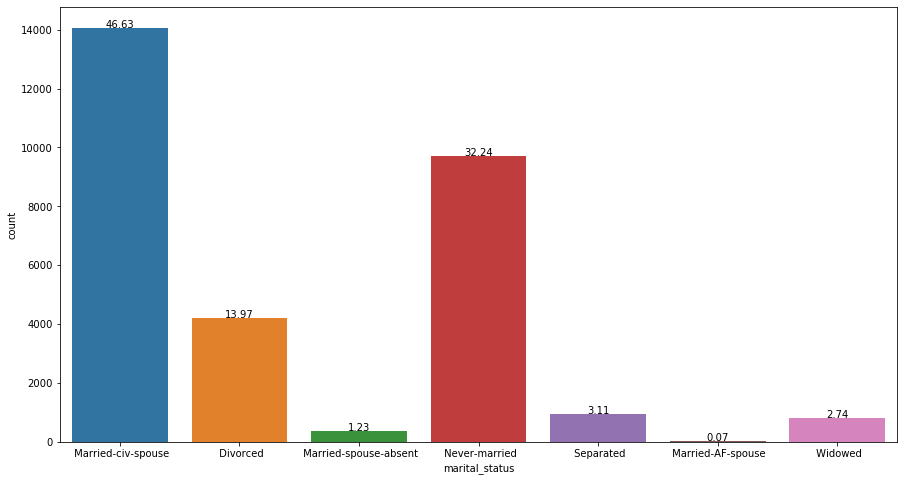

In [15]:
plt.figure(figsize=(15,8))
total = float(len(df) )

ax = sns.countplot(x="marital_status", data=df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

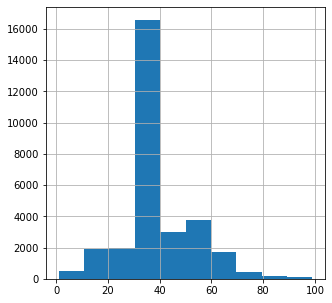

In [16]:
df['hours_per_week'].hist(figsize=(5,5))
plt.show()

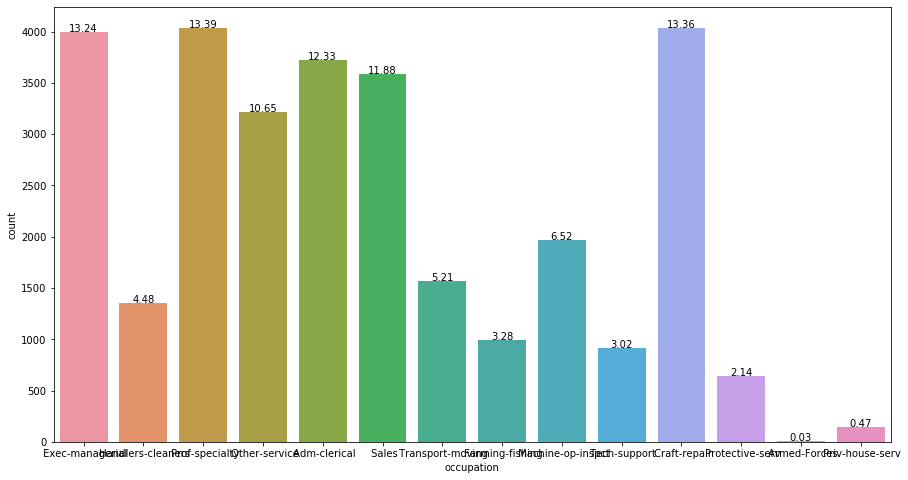

In [17]:
plt.figure(figsize=(15,8))
total = float(len(df) )

ax = sns.countplot(x="occupation", data=df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

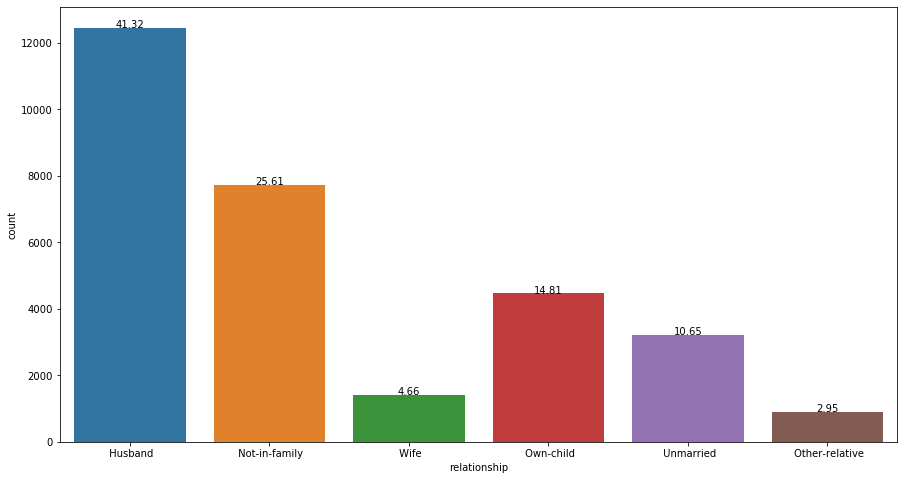

In [18]:
plt.figure(figsize=(15,8))
total = float(len(df) )

ax = sns.countplot(x="relationship", data=df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

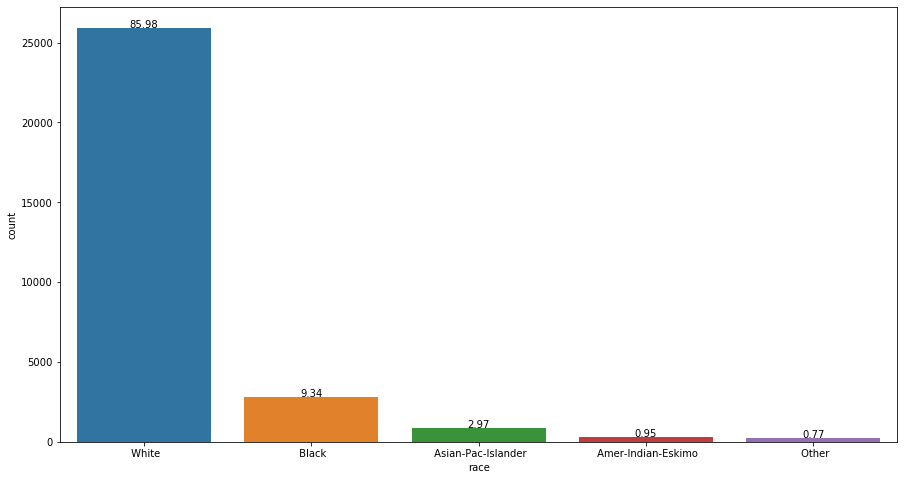

In [19]:
plt.figure(figsize=(15,8))
total = float(len(df) )

ax = sns.countplot(x="race", data=df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

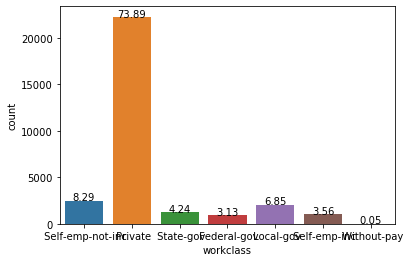

In [20]:
# plt.figure(figsize=(5,5))
total = float(len(df) )

ax = sns.countplot(x="workclass", data=df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

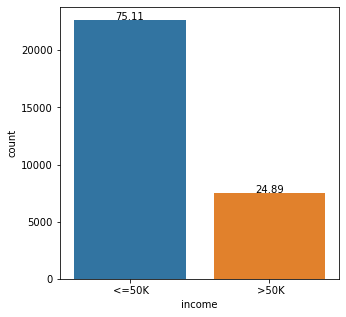

In [21]:
plt.figure(figsize=(5,5))
total = float(len(df) )

ax = sns.countplot(x="income", data=df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

In [22]:
# Column names are renamed here for a better readability
df.rename(columns={'capital_gain': 'capital gain', 'capital_loss': 'capital loss', 'native_country': 'country','hours_per_week': 'hours per week','marital_status': 'marital'}, inplace=True)
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital',
       'occupation', 'relationship', 'race', 'sex', 'capital gain',
       'capital loss', 'hours per week', 'country', 'income'],
      dtype='object')

In [23]:
# Here the columns with a non numerical value are converted into a categorial type
# after which they are converted into codes wihch specify the initial category the values were in for 
# easier modelling of the data
df['workclass'] = df['workclass'].astype('category')
df['education'] = df['education'].astype('category')
df['marital'] = df['marital'].astype('category')
df['occupation'] = df['occupation'].astype('category')
df['relationship'] = df['relationship'].astype('category')
df['race'] = df['race'].astype('category')
df['sex'] = df['sex'].astype('category')
df['country'] = df['country'].astype('category')

df['workclass'] = df['workclass'].cat.codes.astype('category')
df['education'] = df['education'].cat.codes.astype('category')
df['marital'] = df['marital'].cat.codes.astype('category')
df['occupation'] = df['occupation'].cat.codes.astype('category')
df['relationship'] = df['relationship'].cat.codes.astype('category')
df['race'] = df['race'].cat.codes.astype('category')
df['sex'] = df['sex'].cat.codes.astype('category')
df['country'] = df['country'].cat.codes.astype('category')

In [24]:
from sklearn.preprocessing import StandardScaler
# The data is scaled using a standard scaler to minimize the variance differences between columns
# this will ensure the data gives much accurate results
sc = StandardScaler()
df[['age','workclass','fnlwgt','education','education_num','marital','occupation','relationship','race','sex','capital gain', 'capital loss', 'hours per week','country']] = sc.fit_transform(df[['age','workclass','fnlwgt','education','education_num','marital','occupation','relationship','race','sex','capital gain', 'capital loss', 'hours per week','country']])

In [25]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital,occupation,relationship,race,sex,capital gain,capital loss,hours per week,country,income
0,0.880275,1.888018,-1.007909,-0.349871,1.128961,-0.387243,-0.734609,-0.885732,0.385055,0.692823,-0.147437,-0.21859,-2.331495,0.264929,<=50K
1,-0.033338,-0.208884,0.244659,0.174749,-0.439703,-1.722362,-0.238260,-0.261254,0.385055,0.692823,-0.147437,-0.21859,-0.077735,0.264929,<=50K
2,1.108678,-0.208884,0.425206,-2.448351,-1.224035,-0.387243,-0.238260,-0.885732,-2.010994,0.692823,-0.147437,-0.21859,-0.077735,0.264929,<=50K
3,-0.794682,-0.208884,1.406626,-0.349871,1.128961,-0.387243,0.754439,2.236660,-2.010994,-1.443370,-0.147437,-0.21859,-0.077735,-5.303944,<=50K
4,-0.109472,-0.208884,0.897147,0.437059,1.521127,-0.387243,-0.734609,2.236660,0.385055,-1.443370,-0.147437,-0.21859,-0.077735,0.264929,<=50K


In [26]:
# The output is converted into a binary output for accurate model fitting
df = df.replace(' <=50K',0)
df = df.replace(' >50K',1)
df = df.sample(n=10000)

In [27]:
df = df[['age','workclass','fnlwgt','education','education_num','marital','occupation','relationship','race','sex','capital gain', 'capital loss', 'hours per week','country','income']]

train_df,test_df = train_test_split(df,train_size=0.8)

In [28]:
class LogisticRegression:
    
    def __init__(self, learningRate, tolerance, maxIteration = 5):
        
        self.learningRate = learningRate
        self.tolerance = tolerance
        self.maxIteration = maxIteration
    
    def datasetReader(self, train_df, test_df):
        
        # The dataset is split here into a training and testing set and all the column types are
        # converted into floating types
        train_df, test_df = np.array(train_df, dtype = np.float64), np.array(test_df, dtype=np.float64)
        X_train, y_train = train_df[:, 1:] , train_df[:, -1]
        X_test, y_test = test_df[:, 1:] , test_df[:, -1]
        
        return X_train, y_train, X_test, y_test
    
    def sigmoid(self, z):
        sig = 1 / (1+np.exp(-z))
        return sig
    
    def costFunction(self, X, y):

        lambda_ = .0001
        sig = self.sigmoid(X.dot(self.w))
        one = np.ones((y.shape[0],1))
        pred_ = y * np.log(sig) + (one-y) * np.log(one - sig)
        #pred_ = (-((y.T*np.log(sig)) + (one -y ).T * np.log(one - sig))/y.shape[0])
        reg = (lambda_/(y.shape[0]))*(self.w) #L1 Regularisation
        #reg = (lambda_/2*(y.shape[0]))*((self.w)*(self.w)) #L2 Regularisation
        reg = reg.sum()
        cost = pred_.sum()
        cost = cost + reg
        
        return cost
    
    def gradient(self, X, y):                                        
        sig = self.sigmoid(X.dot(self.w))
        grad = (sig - y).dot(X)

        return grad
    
    def gradientDescent(self, X, y):

        costSequence = []
        lastCost = float('inf')
        for i in tqdm(range(self.maxIteration)):
            self.w = self.w - self.learningRate * self.gradient(X, y)
            print(self.w)
            currentCost = self.costFunction(X, y)
            diff = lastCost - currentCost
            print(currentCost)
            lastCost = currentCost
            costSequence.append(currentCost)

            if diff < self.tolerance:
                print('The Model Stopped - No Further Improvement')
                break
        self.plotCost(costSequence)

        return
    
    def plotCost(self, costSequence):

        s = np.array(costSequence)
        t = np.arange(s.size)

        fig, ax = plt.subplots()
        ax.plot(t, s)

        ax.set(xlabel = 'iterations', ylabel = 'cost', title = 'cost trend')
        ax.grid()

        plt.legend(bbox_to_anchor = (1.05, 1), shadow = True)
        plt.show()

    def predict(self, X):

        sig = self.sigmoid(X.dot(self.w))
        return np.around(sig)

    def evaluate(self, y, y_hat):  
        y = (y == 1)
        y_hat = (y_hat == 1)
        
        print(confusion_matrix(y, y_hat))
        accuracy = ((y == y_hat).sum()) / y.size
        precision = ((y & y_hat).sum()) / y_hat.sum()
        recall = ((y & y_hat).sum()) / y.sum()

        return accuracy, recall, precision
       
    def runModel(self,train_df,test_df):
        
        self.train_df = train_df
        self.test_df = test_df
        self.X_train, self.y_train, self.X_test, self.y_test = self.datasetReader(train_df,test_df)
        print(self.X_train.shape)
        self.w = np.ones(self.X_train.shape[1], dtype = np.float64) * 0
        self.gradientDescent(self.X_train, self.y_train)
        print("SELF.W:",self.w)

        y_hat_train = self.predict(self.X_train)
        accuracy, recall, precision = self.evaluate(self.y_train, y_hat_train)
        
        print('Training Accuracy: ', accuracy)
        print('Training Precision: ', precision)
        print('Training Recall: ', recall)
        

In [29]:
# MODEL 1 - LOGISTIC REGRESSION

# The logistic regression model is fitted on the dataset to see how the input is behaving to predict an output
lr = LogisticRegression(tolerance=0.0001, learningRate=0.0000001)

(8000, 14)


  0%|          | 0/5 [00:00<?, ?it/s]

[ 6.57787199e-07 -4.87238496e-07  2.89531455e-05  1.17531848e-04
 -6.71970728e-05  1.52809756e-05 -9.26091482e-05  2.98698274e-05
  8.06491837e-05  7.16338521e-05  5.10288957e-05  8.13827314e-05
  1.20043178e-05  1.00800000e-04]


 20%|██        | 1/5 [00:05<00:20,  5.15s/it]

-44356617.362972565
[ 1.30887107e-06 -9.71960724e-07  5.78896783e-05  2.35027015e-04
 -1.34368217e-04  3.05541375e-05 -1.85176261e-04  5.97260566e-05
  1.61262134e-04  1.43248050e-04  1.02040347e-04  1.62730176e-04
  2.40013391e-05  2.01582814e-04]


 20%|██        | 1/5 [00:09<00:39,  9.77s/it]
No handles with labels found to put in legend.


-44351818.508122936
The Model Stopped - No Further Improvement


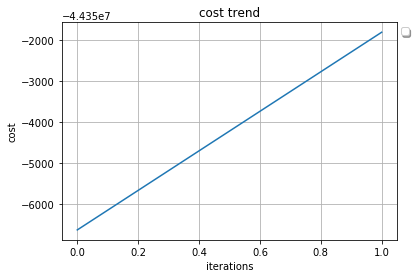

SELF.W: [ 1.30887107e-06 -9.71960724e-07  5.78896783e-05  2.35027015e-04
 -1.34368217e-04  3.05541375e-05 -1.85176261e-04  5.97260566e-05
  1.61262134e-04  1.43248050e-04  1.02040347e-04  1.62730176e-04
  2.40013391e-05  2.01582814e-04]
[[3586 2398]
 [ 212 1804]]
Training Accuracy:  0.67375
Training Precision:  0.4293193717277487
Training Recall:  0.8948412698412699


In [30]:
# The model is executed here on the training set and the output is given from the testing set
lr.runModel(train_df,test_df)

(8000, 6)


  0%|          | 0/5 [00:00<?, ?it/s]

[-3.54456119e-06  1.17442121e-04  7.61988189e-05  4.66917156e-05
  8.06571946e-05  1.01950000e-04]


 20%|██        | 1/5 [00:04<00:16,  4.04s/it]

-44358324.637227215
[-7.08630305e-06  2.34852762e-04  1.52376614e-04  9.33707283e-05
  1.61291475e-04  2.03887841e-04]


 20%|██        | 1/5 [00:07<00:29,  7.48s/it]
No handles with labels found to put in legend.


-44355231.15664452
The Model Stopped - No Further Improvement


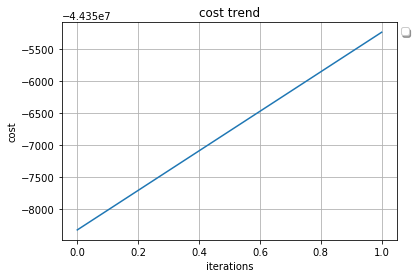

SELF.W: [-7.08630305e-06  2.34852762e-04  1.52376614e-04  9.33707283e-05
  1.61291475e-04  2.03887841e-04]
[[4070 1891]
 [  79 1960]]
Training Accuracy:  0.75375
Training Precision:  0.5089587120228513
Training Recall:  0.9612555174104953


In [31]:
#numerical columns
df1 = df[['age','fnlwgt','education_num','capital gain', 'capital loss', 'hours per week','income']]
train_df,test_df = train_test_split(df1,train_size=0.8)
lr.runModel(train_df,test_df)

(8000, 11)


  0%|          | 0/5 [00:00<?, ?it/s]

[ 5.36476670e-06  1.22545631e-04 -6.90288161e-05  1.76441030e-05
  2.80428568e-05  8.31548776e-05  7.22633165e-05  5.32739295e-05
  8.04897325e-05  1.13766338e-05  1.00450000e-04]


 20%|██        | 1/5 [00:03<00:13,  3.34s/it]

-44357213.58988415
[ 1.07228755e-05  2.45056914e-04 -1.38034319e-04  3.52809106e-05
  5.60747581e-05  1.66283443e-04  1.44507288e-04  1.06531688e-04
  1.60949125e-04  2.27462557e-05  2.00884840e-04]


 20%|██        | 1/5 [00:06<00:26,  6.66s/it]
No handles with labels found to put in legend.


-44353009.98835341
The Model Stopped - No Further Improvement


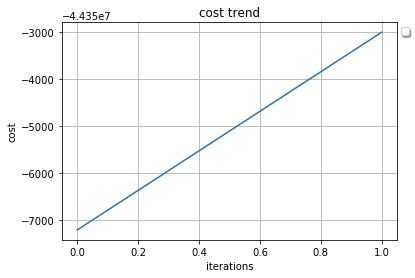

SELF.W: [ 1.07228755e-05  2.45056914e-04 -1.38034319e-04  3.52809106e-05
  5.60747581e-05  1.66283443e-04  1.44507288e-04  1.06531688e-04
  1.60949125e-04  2.27462557e-05  2.00884840e-04]
[[3791 2200]
 [ 133 1876]]
Training Accuracy:  0.708375
Training Precision:  0.4602551521099117
Training Recall:  0.9337979094076655


In [32]:
#removing the unnecessary columns
df = df[['age','workclass','education_num','marital','occupation','race', 'sex', 'capital gain', 'capital loss', 'hours per week','country','income']]
train_df,test_df = train_test_split(df,train_size=0.8)
lr.runModel(train_df,test_df)

In [33]:
X = df[df.columns[0:1]]
y = df[["income"]]
from sklearn.linear_model import LogisticRegression
LRG = LogisticRegression(solver = 'saga',multi_class = 'auto'
).fit(X, y)
LRG.score(X, y)

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method

0.7345

In [34]:
class SVM:
    
    def __init__(self, learningRate = 0.00001, lambdaParam = 0.001, nIters = 100):
        
        self.learningRate = learningRate
        self.lambdaParam = lambdaParam
        self.nIters = nIters

    def fit(self, X, y):
        nSamples, nFeatures = X.shape
        self.w = np.zeros(nFeatures)
        self.b = 0

        for _ in range(self.nIters):
            for idx, x_i in enumerate(X):
                condition = y[idx] * (np.dot(x_i, self.w) + self.b) >= 1

                if condition:
                    self.w -= self.learningRate * (2 * self.lambdaParam * self.w)

                else:
                    self.w -= self.learningRate * (2 * self.lambdaParam * self.w - y[idx] * x_i)
                    self.b -= self.learningRate * (-y[idx])

    def predict(self, X):
        approx = np.dot(X, self.w) + self.b
        return np.sign(approx)
     

In [35]:
# MODEL 2 - SVM
# An SVM model is fitted on the dataset to see how the dataset works on this model
clf = SVM()

In [36]:
# The dataframe is split into an input X and output y
y = df[["income"]]
X = df.drop('income', axis = 1)
# The dataframes are converted into a numpy array data type
X = X.to_numpy()
y = y.to_numpy()
# The datasets are split into a training and testing set where 70% of the data is
# the training set
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)
clf.fit(X_train, y_train)

In [37]:
print(clf.w)

[ 0.20827528 -0.00525963  0.21883584 -0.20608348  0.00379066  0.04508949
  0.14137301  0.10922797  0.05058282  0.15791925  0.01057539]


In [38]:
print(clf.b)

[0.91649]


In [39]:
# Printing the predicted values using the X_test data
print(clf.predict(X_test))

[ 1.  1.  1. ...  1. -1.  1.]


In [40]:
import tensorflow.keras
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Input, MaxPool2D, Dense, Conv2D, Dropout

/srv/conda/envs/notebook/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/srv/conda/envs/notebook/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/srv/conda/envs/notebook/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/srv/conda/envs/notebook/lib/python3.7/site-packages/tensorflow/python/frame

In [41]:
def load_dataset():
    train_dataset = h5py.File('train_signs.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File('test_signs.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [42]:
# MODEL 3 - NEURAL NETWORKS
# The neural network model is implemented to fit the data and to check for the prediction accuracy 
model = Sequential()
# 4 layers are added for the model 
model.add(Dense(128, kernel_initializer = 'normal', input_dim = 11, activation = 'relu'))
model.add(Dense(256, kernel_initializer = 'normal', activation = 'relu'))
model.add(Dense(256, kernel_initializer = 'normal', activation = 'relu'))
model.add(Dense(256, kernel_initializer = 'normal', activation = 'relu'))
# A sigmoid acitvation is used because the output is in a binary format
model.add(Dense(1, activation = 'sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.


In [43]:
model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [44]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               1536      
_________________________________________________________________
dense_1 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_3 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 257       
Total params: 166,401
Trainable params: 166,401
Non-trainable params: 0
_________________________________________________________________


In [45]:
model.fit(X_train, y_train, batch_size=64, epochs=2)

Instructions for updating:
Use tf.cast instead.
Epoch 1/2
8000/8000 [==============================] - 3s 322us/sample - loss: 0.3978 - acc: 0.8155
Epoch 2/2
8000/8000 [==============================] - 2s 287us/sample - loss: 0.3398 - acc: 0.8390


In [46]:
results = model.evaluate(X_test, y_test, batch_size=128)
results

2000/2000 [==============================] - 0s 89us/sample - loss: 0.3323 - acc: 0.8395


[0.3323287389278412, 0.8395]